<a href="https://colab.research.google.com/github/tohsin/Reinforcement_learning_projects/blob/main/Distributional_DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
from matplotlib import pyplot as plt

In [ ]:
probs=np.array([0.6,0.1,0.1,0.1,0.1])
outcomes=np.array([18,21,17,17,21])
expected_value=0.0
for i in range(probs.shape[0]):
    expected_value = expected_value+probs[i]*outcomes[i]
expected_value

18.4

In [ ]:
expected_value=probs @ outcomes
expected_value

18.4

<BarContainer object of 51 artists>

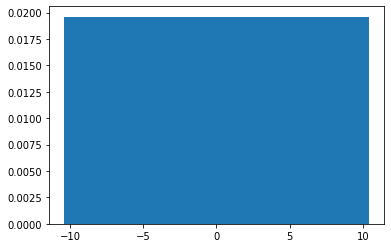

In [ ]:
vmax,vmin=10,-10
nsup=51
support=np.linspace(vmin,vmax,nsup)
probs=np.ones(nsup)
probs /=probs.sum()
z3=torch.from_numpy(probs).float()
plt.bar(support,probs)

In [ ]:
def update_dist(r,support,probs,lim=(-10.,10.),gamma=0.8):
    nsup = probs.shape[0]
    vmin,vmax = lim[0],lim[1]
    dz = (vmax-vmin)/(nsup-1.) #A
    bj = np.round((r-vmin)/dz) #B
    bj = int(np.clip(bj,0,nsup-1)) #C
    m = probs.clone()
    j = 1
    for i in range(bj,1,-1): #D
        m[i] += np.power(gamma,j) * m[i-1]
        j += 1
    j = 1
    for i in range(bj,nsup-1,1): #E
        m[i] += np.power(gamma,j) * m[i+1]
        j += 1
    m /= m.sum() #F
    return m

<BarContainer object of 51 artists>

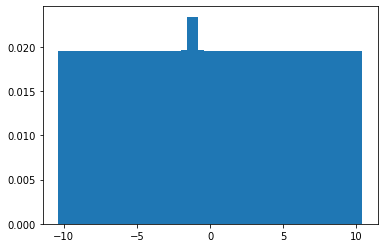

In [ ]:
ob_reward = -1
Z = torch.from_numpy(probs).float()
Z = update_dist(ob_reward,torch.from_numpy(support).float(),Z,lim=(vmin,vmax),gamma=0.1)
plt.bar(support,Z)

<BarContainer object of 51 artists>

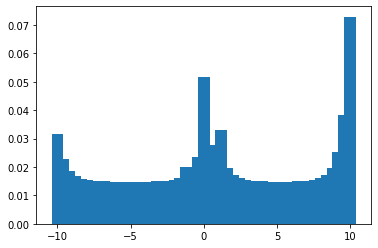

In [ ]:
ob_rewards = [10,10,10,0,1,0,-10,-10,10,10]
for i in range(len(ob_rewards)):
    Z = update_dist(ob_rewards[i], torch.from_numpy(support).float(), Z, lim=(vmin,vmax), gamma=0.5)
plt.bar(support, Z)

<BarContainer object of 51 artists>

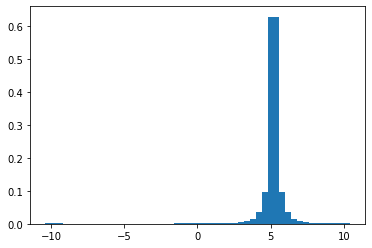

In [ ]:
ob_rewards = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
for i in range(len(ob_rewards)):
    Z = update_dist(ob_rewards[i], torch.from_numpy(support).float(), \
    Z, lim=(vmin,vmax), gamma=0.7)
plt.bar(support, Z)

In [ ]:
def dist_dqn(x,theta,aspace=3):
    dim0,dim1,dim2,dim3=128,100,25,51
    t1=dim0 *dim1
    t2=dim2 * dim1
    theta1=theta[0:t1].reshape(dim0,dim1)

SyntaxError: unexpected EOF while parsing (<ipython-input-51-5eebc54a562b>, line 1)